In [2]:
#Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [100]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

In [3]:
#Reading the allotment csv
df = pd.read_csv("pg_allotment.tsv", index_col=False, sep = "\t")

In [4]:
np.shape(df)

(13237, 9)

In [5]:
df.describe()

,SNo,Rank
count,13237.000000,13237.000000
mean,6619.000000,21974.772758
std,3821.337091,21327.591256
min,1.000000,1.000000
25%,3310.000000,4580.000000
50%,6619.000000,14436.000000
75%,9928.000000,34519.000000
max,13237.000000,96409.000000


In [6]:
df.columns

Index(['SNo', 'Rank', 'Allotted Quota', 'Allotted Institute', 'City', 'Course',
       'Allotted Category', 'Candidate Category', 'Remarks'],
      dtype='object')

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13237 entries, 0 to 13236
Data columns (total 9 columns):
SNo                   13237 non-null int64
Rank                  13237 non-null int64
Allotted Quota        13237 non-null object
Allotted Institute    13237 non-null object
City                  13237 non-null object
Course                13237 non-null object
Allotted Category     13237 non-null object
Candidate Category    13237 non-null object
Remarks               13237 non-null object
dtypes: int64(2), object(7)
memory usage: 930.9+ KB


In [7]:
df.isna().sum()

SNo                   0
Rank                  0
Allotted Quota        0
Allotted Institute    0
City                  0
Course                0
Allotted Category     0
Candidate Category    0
Remarks               0
dtype: int64

In [8]:
#Number of seats allocated per branch [M.D. could be Anaesthology or Pharmocology, M.S. is Opthomology]
df.Course.value_counts(normalize=True)*100

M.D. (GENERAL MEDICINE)                                                                                            11.943794
M.D. (ANAESTHESIOLOGY)                                                                                             10.531087
M.S. (GENERAL SURGERY)                                                                                             10.289340
M.D. (Obst. & Gynae)/MS (Obstetrics and Gynaecology)                                                                8.974843
M.D. (PAEDIATRICS)                                                                                                  7.977638
M.S. (ORTHOPAEDICS)                                                                                                 6.058775
M.D. (PATHOLOGY)                                                                                                    5.937901
M.D. (RADIO- DIAGNOSIS)                                                                                             5.038906


In [16]:
#Possible percentages of allotted categories
df['Allotted Category'].value_counts(normalize=True)*100

GN         80.735816
SC         10.379995
ST          5.038906
OBC         2.734759
GN PwD      0.944323
SC PwD      0.083100
OBC PwD     0.067991
ST PwD      0.015109
Name: Allotted Category, dtype: float64

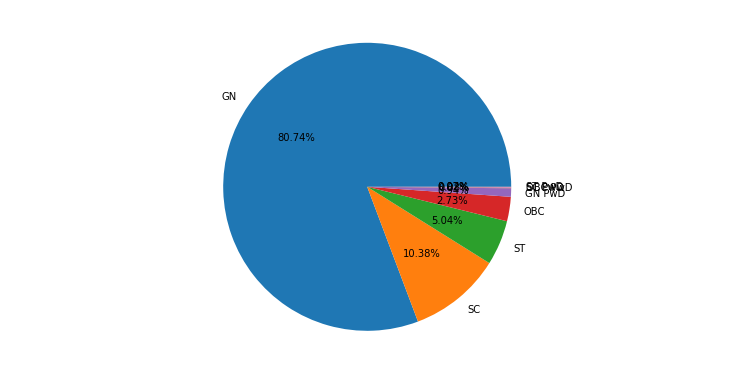

In [17]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
fig.set_size_inches(10, 5)
ax.axis('equal')
labels = df['Allotted Category'].value_counts().index.tolist()
numbers = list(df['Allotted Category'].value_counts())
ax.pie(numbers, labels = labels,autopct='%1.2f%%')
plt.show()

In [18]:
#Possible percentages of candidate categories
(df['Candidate Category'].value_counts(normalize=True))*100

GNNO       51.945305
OBC        25.866888
SC         11.112790
ST          5.129561
EWNO        4.812269
GN PwD      0.468384
OBC PwD     0.445720
EW1         0.113319
SC PwD      0.090655
ST PwD      0.015109
Name: Candidate Category, dtype: float64

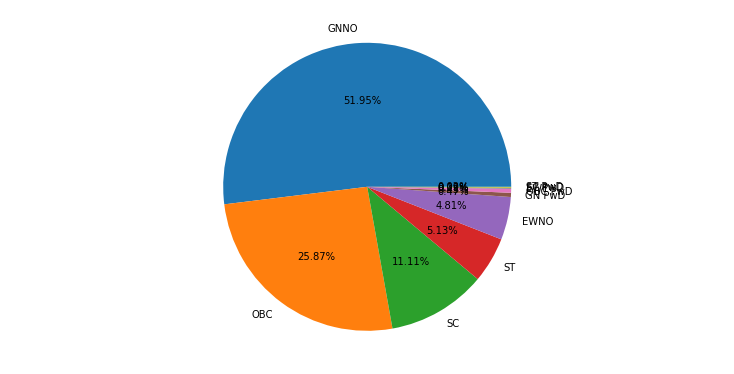

In [19]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
fig.set_size_inches(10, 5)
ax.axis('equal')
labels = df['Candidate Category'].value_counts().index.tolist()
numbers = list(df['Candidate Category'].value_counts())
ax.pie(numbers, labels = labels,autopct='%1.2f%%')
plt.show()

In [21]:
#Possible percentages of quota
df['Allotted Quota'].value_counts(normalize=True)*100

AIQ    66.722067
MNG    25.383395
NRI     2.477903
DU      2.017073
IP      1.578908
AMU     0.755458
BHU     0.385284
MM      0.355065
JM      0.324847
Name: Allotted Quota, dtype: float64

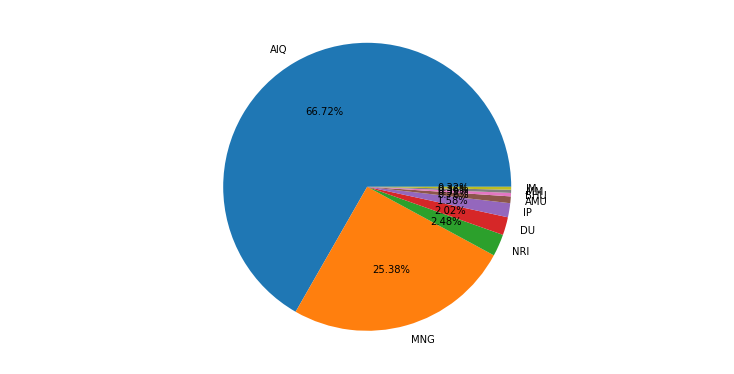

In [22]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
fig.set_size_inches(10, 5)
ax.axis('equal')
labels = df['Allotted Quota'].value_counts().index.tolist()
numbers = list(df['Allotted Quota'].value_counts())
ax.pie(numbers, labels = labels,autopct='%1.2f%%')
plt.show()

In [24]:
category = "GN"
quota = "AIQ"

In [26]:
#Number of seats in alloted category = General
df[df['Allotted Category'] == category].count()['Rank']

10687

In [29]:
#Percentages of candidate category with general seats allotted
df[df['Allotted Category'] == category].groupby(['Candidate Category']).size()*100/df[df['Allotted Category'] == category].count()['Candidate Category']


Candidate Category
EW1         0.018714
EWNO        5.960513
GNNO       64.283709
OBC        28.707776
OBC PwD     0.009357
SC          0.907645
ST          0.112286
dtype: float64

In [30]:
#For All India quota, seat distribution by Category
df[df['Allotted Quota'] == quota].groupby(['Allotted Category']).size()*100/df[df['Allotted Quota'] == quota].count()['Allotted Category']

Allotted Category
GN         73.980978
GN PwD      1.392663
OBC         2.524909
OBC PwD     0.090580
SC         14.662591
SC PwD      0.124547
ST          7.201087
ST PwD      0.022645
dtype: float64

In [31]:
df[df['Allotted Quota'] == quota].count()['Rank']

8832

In [32]:
#For All India quota, seat distribution by Candidate Category
df[df['Allotted Quota'] == quota].groupby(['Candidate Category']).size()*100/df[df['Allotted Quota'] == quota].count()['Candidate Category']

Candidate Category
EW1         0.169837
EWNO        5.355525
GN PwD      0.679348
GNNO       44.938859
OBC        25.860507
OBC PwD     0.645380
SC         14.979620
SC PwD      0.135870
ST          7.212409
ST PwD      0.022645
dtype: float64

In [33]:
#For Management quota, seat distribution by Category -> No reservations for management seats validates this output.
df[df['Allotted Quota'] == "MNG"].groupby(['Allotted Category']).size()*100/df[df['Allotted Quota'] == "MNG"].count()['Allotted Category']

Allotted Category
GN    100.0
dtype: float64

In [34]:
df[df['Allotted Quota'] == "MNG"].count()

SNo                   3360
Rank                  3360
Allotted Quota        3360
Allotted Institute    3360
City                  3360
Course                3360
Allotted Category     3360
Candidate Category    3360
Remarks               3360
dtype: int64

In [35]:
#For Management quota, seat distribution by Candidate Category
df[df['Allotted Quota'] == "MNG"].groupby(['Candidate Category']).size()*100/df[df['Allotted Quota'] == "MNG"].count()['Candidate Category']

Candidate Category
EWNO        3.601190
GNNO       68.482143
OBC        25.952381
OBC PwD     0.029762
SC          1.726190
ST          0.208333
dtype: float64

In [37]:
df[df['Allotted Quota'] == "MNG"].count()['Rank']

3360

In [38]:
#For NRI quota, seat distribution by  Category
df[df['Allotted Quota'] == "NRI"].groupby(['Allotted Category']).size()*100/df[df['Allotted Quota'] == "NRI"].count()['Allotted Category']

Allotted Category
GN    100.0
dtype: float64

In [40]:
df[df['Allotted Quota'] == "NRI"].count()['Rank']

328

In [41]:
#For NRI quota, seat distribution by Candidate Category
df[df['Allotted Quota'] == "NRI"].groupby(['Candidate Category']).size()*100/df[df['Allotted Quota'] == "NRI"].count()['Candidate Category']

Candidate Category
EWNO     1.524390
GNNO    75.609756
OBC     21.036585
SC       1.219512
ST       0.609756
dtype: float64

In [43]:
course = "M.D. (RADIO- DIAGNOSIS)"

In [44]:
#Top 5 ranks for Radiology
df[df['Course'] == course].head()

,SNo,Rank,Allotted Quota,Allotted Institute,City,Course,Allotted Category,Candidate Category,Remarks
4,5,5,AIQ,MAULANA AZAD MEDICAL COLL.,N.DELHI,M.D. (RADIO- DIAGNOSIS),GN,GNNO,Allotted
6,7,7,AIQ,MAULANA AZAD MEDICAL COLL.,N.DELHI,M.D. (RADIO- DIAGNOSIS),GN,GNNO,Allotted
11,12,12,AIQ,MAULANA AZAD MEDICAL COLL.,N.DELHI,M.D. (RADIO- DIAGNOSIS),GN,GNNO,Allotted
16,17,17,AIQ,Seth Gordhandas Sunderdas Medical College,Mumbai,M.D. (RADIO- DIAGNOSIS),GN,GNNO,Allotted
17,18,18,AIQ,MAULANA AZAD MEDICAL COLL.,N.DELHI,M.D. (RADIO- DIAGNOSIS),GN,GNNO,Allotted


In [45]:
#Bottom 5 ranks for Radiology
df[df['Course'] == course].tail()

,SNo,Rank,Allotted Quota,Allotted Institute,City,Course,Allotted Category,Candidate Category,Remarks
12769,12770,71549,NRI,K.S Hegde Medical Academy,Mangaluru,M.D. (RADIO- DIAGNOSIS),GN,GNNO,Allotted
12845,12846,73629,NRI,K.S Hegde Medical Academy,Mangaluru,M.D. (RADIO- DIAGNOSIS),GN,GNNO,Allotted
12872,12873,74312,NRI,Bharati Vidyapeeth Dee. Univ. Med. College,Pune,M.D. (RADIO- DIAGNOSIS),GN,GNNO,Allotted
13098,13099,84853,AIQ,Gajra Raja Medical College,Gwalior,M.D. (RADIO- DIAGNOSIS),ST PwD,ST PwD,Allotted
13180,13181,89909,NRI,Yenepoya Medical College,Mangalore,M.D. (RADIO- DIAGNOSIS),GN,OBC,Allotted


In [46]:
df.groupby(['Course','Allotted Quota','Allotted Category']).min()

SNo  \
Course                                             Allotted Quota Allotted Category          
DIP IN RADIATION MEDICINE                          AIQ            GN                  5784   
                                                   DU             GN                  5631   
                                                                  OBC                 9049   
DIP. IN DERM. VENEREOLOGY & LEPROSY/DERMATOLO G... AIQ            GN                  1569   
                                                                  GN PwD             12215   
...                                                                                    ...   
MD/MS (Anatomy)                                    IP             GN                 12882   
                                                   MNG            GN                 11580   
PG Diploma in Psychological Medicine / Psychiat... AIQ            GN                  5329   
                                                                  ST                 11759   
                                                   MNG            GN                 10293   

                                                                                      Rank  \
Course                                             Allotted Quota Allotted Category          
DIP IN RADIATION MEDICINE                          AIQ            GN                 11046   
                                                   DU             GN                 10504   
                                                                  OBC                28233   
DIP. IN DERM. VENEREOLOGY & LEPROSY/DERMATOLO G... AIQ            GN                  1882   
                                                                  GN PwD             58936   
...                                                                                    ...   
MD/MS (Anatomy)                                    IP             GN                 74567   
                                                   MNG            GN                 49912   
PG Diploma in Psychological Medicine / Psychiat... AIQ            GN                  9499   
                                                                  ST                 52265   
                                                   MNG            GN                 37366   

                                                                                                                    Allotted Institute  \
Course                                             Allotted Quota Allotted Category                                                      
DIP IN RADIATION MEDICINE                          AIQ            GN                                      INS. OF NUC.MED. and AL.SCI.   
                                                   DU             GN                 Institute of Nuclear Medicine and Allied Sciences   
                                                                  OBC                Institute of Nuclear Medicine and Allied Sciences   
DIP. IN DERM. VENEREOLOGY & LEPROSY/DERMATOLO G... AIQ            GN                                            Andhra Medical College   
                                                                  GN PwD                                        Andhra Medical College   
...                                                                                                                                ...   
MD/MS (Anatomy)                                    IP             GN                                      VMMC and SAFDARJANG HOSPITAL   
                                                   MNG            GN                                          Kasturba Medical College   
PG Diploma in Psychological Medicine / Psychiat... AIQ            GN                          Lokmanya Tilak Municipal Medical College   
                                                                  ST                                            Guntur Medi

In [47]:
df.groupby(['Course','Allotted Quota','Allotted Category']).max()

SNo  \
Course                                             Allotted Quota Allotted Category          
DIP IN RADIATION MEDICINE                          AIQ            GN                  5814   
                                                   DU             GN                  5631   
                                                                  OBC                 9049   
DIP. IN DERM. VENEREOLOGY & LEPROSY/DERMATOLO G... AIQ            GN                  2546   
                                                                  GN PwD             12755   
...                                                                                    ...   
MD/MS (Anatomy)                                    IP             GN                 12882   
                                                   MNG            GN                 13015   
PG Diploma in Psychological Medicine / Psychiat... AIQ            GN                  6029   
                                                                  ST                 11759   
                                                   MNG            GN                 10293   

                                                                                      Rank  \
Course                                             Allotted Quota Allotted Category          
DIP IN RADIATION MEDICINE                          AIQ            GN                 11155   
                                                   DU             GN                 10504   
                                                                  OBC                28233   
DIP. IN DERM. VENEREOLOGY & LEPROSY/DERMATOLO G... AIQ            GN                  3303   
                                                                  GN PwD             70759   
...                                                                                    ...   
MD/MS (Anatomy)                                    IP             GN                 74567   
                                                   MNG            GN                 79142   
PG Diploma in Psychological Medicine / Psychiat... AIQ            GN                 12067   
                                                                  ST                 52265   
                                                   MNG            GN                 37366   

                                                                                                                    Allotted Institute  \
Course                                             Allotted Quota Allotted Category                                                      
DIP IN RADIATION MEDICINE                          AIQ            GN                                      INS. OF NUC.MED. and AL.SCI.   
                                                   DU             GN                 Institute of Nuclear Medicine and Allied Sciences   
                                                                  OBC                Institute of Nuclear Medicine and Allied Sciences   
DIP. IN DERM. VENEREOLOGY & LEPROSY/DERMATOLO G... AIQ            GN                                 Topiwala National Medical College   
                                                                  GN PwD                                Sarojini Naidu Medical College   
...                                                                                                                                ...   
MD/MS (Anatomy)                                    IP             GN                                      VMMC and SAFDARJANG HOSPITAL   
                                                   MNG            GN                                 VMKV Medical College and Hospital   
PG Diploma in Psychological Medicine / Psychiat... AIQ            GN                                 Topiwala National Medical College   
                                                                  ST                                            Guntur Medi

In [48]:
#Total seats in radio
df[df['Course'] == course].count()['Rank']

667

In [49]:
#% of seats in Radio by allotted category
df[df['Course'] == course].groupby(['Allotted Category']).size()*100/df[df['Course'] == course].count()['Allotted Category']

Allotted Category
GN         79.610195
GN PwD      2.398801
OBC         3.598201
OBC PwD     0.299850
SC          9.295352
ST          4.647676
ST PwD      0.149925
dtype: float64

In [50]:
#% of seats in Radio by candidate category

df[df['Course'] == course].groupby(['Candidate Category']).size()*100/df[df['Course'] == course].count()['Candidate Category']

Candidate Category
EW1         0.449775
EWNO        4.047976
GN PwD      1.349325
GNNO       58.320840
OBC        20.089955
OBC PwD     0.899550
SC         10.044978
ST          4.647676
ST PwD      0.149925
dtype: float64

In [51]:
#% of seats in Radio by quota
df[df['Course'] == course].groupby(['Allotted Quota']).size()*100/df[df['Course'] == course].count()['Allotted Quota']

Allotted Quota
AIQ    51.424288
AMU     0.899550
BHU     0.599700
DU      2.998501
IP      2.248876
JM      0.749625
MM      0.449775
MNG    31.634183
NRI     8.995502
dtype: float64

In [52]:
quota = 'MNG'

In [54]:
#% of seats in Radio and Management by allotted category
df.loc[(df['Course'] == course) & (df['Allotted Quota'] == quota)].groupby(['Allotted Category']).size()*100/df.loc[(df['Course'] == course) & (df['Allotted Quota'] == quota)].count()['Allotted Category']

Allotted Category
GN    100.0
dtype: float64

In [56]:
df.loc[(df['Course'] == course) & (df['Allotted Quota'] == quota)].count()['Rank']

211

In [57]:
#% of seats in Radio and Management by candidate category
df.loc[(df['Course'] == course) & (df['Allotted Quota'] == quota)].groupby(['Candidate Category']).size()*100/df.loc[(df['Course'] == course) & (df['Allotted Quota'] == quota)].count()['Candidate Category']

Candidate Category
EWNO     2.369668
GNNO    72.985782
OBC     23.222749
SC       1.421801
dtype: float64

In [58]:
#Top ranks in Radio by quota and category
df[df['Course'] == course].groupby(['Allotted Quota','Allotted Category','Candidate Category']).min()

SNo   Rank  \
Allotted Quota Allotted Category Candidate Category                 
AIQ            GN                EWNO                   41     42   
                                 GNNO                    5      5   
                                 OBC                   124    130   
                                 SC                    137    144   
               GN PwD            EW1                  6586  14246   
                                 GN PwD               6125  12406   
                                 OBC PwD              6229  12762   
               OBC               OBC                    37     38   
               OBC PwD           OBC PwD              5772  10991   
               SC                SC                    520    573   
               ST                ST                   1054   1213   
               ST PwD            ST PwD              13099  84853   
AMU            GN                GNNO                  493    543   
BHU            OBC               OBC                  3244   4472   
               SC                SC                   7213  17274   
               ST                ST                   5649  10565   
DU             GN                GNNO                   42     43   
                                 OBC                   239    257   
               GN PwD            GN PwD              12697  69335   
               OBC               OBC                  1253   1471   
               SC                SC                   3017   4089   
               ST                ST                   8800  26447   
IP             GN                EWNO                 1047   1205   
                                 GNNO                  203    216   
                                 SC                   3980   5929   
               OBC               OBC                  2746   3620   
               SC                SC                   3425   4784   
JM             GN                EWNO                 6612  14402   
                                 GNNO                 5847  11300   
MM             GN                EWNO                 7590  19273   
                                 OBC                  6591  14256   
MNG            GN                EWNO                 5049   8584   
                                 GNNO                 1934   2376   
                                 OBC                  1246   1459   
                                 SC                   8223  22750   
NRI            GN                GNNO                 6905  15838   
                                 OBC                  8317  23253   

                                                                                    Allotted Institute  \
Allotted Quota Allotted Category Candidate Category                                                      
AIQ            GN                EWNO                                        Bangalore Medical College   
                                 GNNO                                           Andhra Medical College   
                                 OBC                 Agartala Government Medical College G.B. Pant ...   
                                 SC                  Institute of Post Graduate Medical Education R...   
               GN PwD            EW1                                            Andhra Medical College   
                                 GN PwD              Agartala Government Medical College G.B. Pant ...   
                                 OBC PwD                                    Government Medical College   
               OBC               OBC                                     INSTITUTE OF MEDICAL SCIENCES   
               OBC PwD           OBC PwD                                    MAULANA AZAD MEDICAL COLL.   
               SC                SC                  Agartala Government Medical College G.B. Pant ...   
               ST                ST                                               B.J. Medi

In [59]:
#Bottom ranks in Radio by quota and category
df[df['Course'] == course].groupby(['Allotted Quota','Allotted Category','Candidate Category']).max()

SNo   Rank  \
Allotted Quota Allotted Category Candidate Category                 
AIQ            GN                EWNO                 1397   1655   
                                 GNNO                 1858   2271   
                                 OBC                  1645   1982   
                                 SC                    137    144   
               GN PwD            EW1                  9734  33121   
                                 GN PwD              10819  41959   
                                 OBC PwD             12511  64842   
               OBC               OBC                   775    877   
               OBC PwD           OBC PwD              6365  13316   
               SC                SC                   6144  12465   
               ST                ST                   7672  19682   
               ST PwD            ST PwD              13099  84853   
AMU            GN                GNNO                 2601   3393   
BHU            OBC               OBC                  4518   7152   
               SC                SC                   7213  17274   
               ST                ST                   5649  10565   
DU             GN                GNNO                  688    775   
                                 OBC                   239    257   
               GN PwD            GN PwD              12697  69335   
               OBC               OBC                  2788   3697   
               SC                SC                   4725   7711   
               ST                ST                   9213  29420   
IP             GN                EWNO                 1047   1205   
                                 GNNO                 3789   5536   
                                 SC                   3980   5929   
               OBC               OBC                  4856   8022   
               SC                SC                   7030  16388   
JM             GN                EWNO                 6612  14402   
                                 GNNO                 6764  15202   
MM             GN                EWNO                 7590  19273   
                                 OBC                  6810  15426   
MNG            GN                EWNO                 7376  18180   
                                 GNNO                11229  46097   
                                 OBC                 11318  47142   
                                 SC                  11315  47122   
NRI            GN                GNNO                12873  74312   
                                 OBC                 13181  89909   

                                                                                    Allotted Institute  \
Allotted Quota Allotted Category Candidate Category                                                      
AIQ            GN                EWNO                                       V.M.M.C. and S.J. HOSPITAL   
                                 GNNO                                VEER SURENDRA SAI MEDICAL COLLEGE   
                                 OBC                                       TIRUNELVELI Medical College   
                                 SC                  Institute of Post Graduate Medical Education R...   
               GN PwD            EW1                                 Topiwala National Medical College   
                                 GN PwD                                     V.M.M.C. and S.J. HOSPITAL   
                                 OBC PwD                                         Pt. B.D. Sharma PGIMS   
               OBC               OBC                                        V.M.M.C. and S.J. HOSPITAL   
               OBC PwD           OBC PwD                                    V.M.M.C. and S.J. HOSPITAL   
               SC                SC                                         V.M.M.C. and S.J. HOSPITAL   
               ST                ST                                         V.M.M.C. and S.

In [60]:
#Bottom ranks in Opthal by quota and categories
#course = "M.S. (OPHTHALMOLOGY)"

#Bottom ranks in Paediatrics by quota and categories
#course = "M.D. (PAEDIATRICS)"

#Bottom ranks in ENT by quota and categories
#course = "M.S. (E.N.T.)"

#Bottom ranks in ENT by quota and categories
course = "M.D. (PATHOLOGY)"
df[df['Course'] == course].groupby(['Allotted Quota','Allotted Category','Candidate Category']).max()

SNo   Rank  \
Allotted Quota Allotted Category Candidate Category                 
AIQ            GN                EWNO                 7652  19533   
                                 GNNO                 8162  22437   
                                 OBC                  8199  22657   
               GN PwD            EW1                 13114  85416   
                                 GN PwD              13149  87964   
               OBC               OBC                  7482  18734   
               SC                SC                  10888  42698   
               ST                ST                  12407  62300   
AMU            GN                GNNO                 9375  30520   
DU             GN                GNNO                 6968  16082   
                                 OBC                  7291  17753   
               OBC               OBC                  7550  19088   
               SC                SC                   9153  28959   
               ST                ST                  12005  55763   
IP             GN                EWNO                11360  47492   
                                 GNNO                10989  43564   
               OBC               OBC                 12740  70358   
               SC                SC                  13081  83539   
JM             GN                EWNO                13027  79712   
                                 GNNO                12915  75672   
MM             GN                GNNO                12691  69213   
                                 OBC                 12619  67344   
MNG            GN                EWNO                12553  65731   
                                 GNNO                13048  80565   
                                 OBC                 13236  96157   
                                 SC                  13192  91774   
                                 ST                  13219  94793   
NRI            GN                GNNO                12945  76460   
                                 SC                  12620  67398   

                                                                              Allotted Institute  \
Allotted Quota Allotted Category Candidate Category                                                
AIQ            GN                EWNO                               Shri MP Shah Medical College   
                                 GNNO                   Vijaynagar Institute of Medical Sciences   
                                 OBC                    Vijaynagar Institute of Medical Sciences   
               GN PwD            EW1                 Swami Ramanand Teerth Rural Medical College   
                                 GN PwD                               Government Medical College   
               OBC               OBC                                  V.M.M.C. and S.J. HOSPITAL   
               SC                SC                                   V.M.M.C. and S.J. HOSPITAL   
               ST                ST                                   V.M.M.C. and S.J. HOSPITAL   
AMU            GN                GNNO                                  JWAHAR LAL NEHRU M.C. AMU   
DU             GN                GNNO                                UNIV. COLL. OF MED. SCIENCE   
                                 OBC                                 UNIV. COLL. OF MED. SCIENCE   
               OBC               OBC                                 UNIV. COLL. OF MED. SCIENCE   
               SC                SC                                  UNIV. COLL. OF MED. SCIENCE   
               ST                ST                                  LADY HARDINGE MEDICAL COLL.   
IP             GN                EWNO                               VMMC and SAFDARJANG HOSPITAL   
                                 GNNO                               VMMC and SAFDARJANG HOSPITAL   
               OBC               OBC                                VMMC and SAFDARJANG HOSPITAL   
               

In [62]:
#Top ranks in Pathology by quota and categories
course = "M.D. (PATHOLOGY)"
df[df['Course'] == course].groupby(['Allotted Quota','Allotted Category','Candidate Category']).min()

SNo   Rank  \
Allotted Quota Allotted Category Candidate Category                 
AIQ            GN                EWNO                 3833   5629   
                                 GNNO                 2528   3274   
                                 OBC                  3518   4978   
               GN PwD            EW1                 10998  43662   
                                 GN PwD              10152  36307   
               OBC               OBC                  5006   8460   
               SC                SC                   5779  11030   
               ST                ST                  10003  35096   
AMU            GN                GNNO                 6999  16211   
DU             GN                GNNO                 5883  11447   
                                 OBC                  6885  15722   
               OBC               OBC                  6507  13878   
               SC                SC                   7593  19279   
               ST                ST                  11997  55690   
IP             GN                EWNO                11311  47093   
                                 GNNO                 7545  19067   
               OBC               OBC                 11654  50861   
               SC                SC                  13042  80295   
JM             GN                EWNO                12190  58548   
                                 GNNO                12199  58686   
MM             GN                GNNO                12067  56543   
                                 OBC                 12170  58077   
MNG            GN                EWNO                10183  36558   
                                 GNNO                 8178  22520   
                                 OBC                  9058  28306   
                                 SC                  11390  47774   
                                 ST                  13176  89692   
NRI            GN                GNNO                12945  76460   
                                 SC                  12620  67398   

                                                                                    Allotted Institute  \
Allotted Quota Allotted Category Candidate Category                                                      
AIQ            GN                EWNO                                             B.J. Medical College   
                                 GNNO                                      A.N. Magadh Medical College   
                                 OBC                 Agartala Government Medical College G.B. Pant ...   
               GN PwD            EW1                                        Government Medical College   
                                 GN PwD                                           B.J. Medical College   
               OBC               OBC                                                        ESI PGIMSR   
               SC                SC                  Agartala Government Medical College G.B. Pant ...   
               ST                ST                                              Assam Medical College   
AMU            GN                GNNO                                        JWAHAR LAL NEHRU M.C. AMU   
DU             GN                GNNO                                      LADY HARDINGE MEDICAL COLL.   
                                 OBC                                       UNIV. COLL. OF MED. SCIENCE   
               OBC               OBC                                       LADY HARDINGE MEDICAL COLL.   
               SC                SC                                         MAULANA AZAD MEDICAL COLL.   
               ST                ST                  G B Pant Institute of Post Graduate Medical Ed...   
IP             GN                EWNO                Atal Bihari Vajpayee Institute of Medical Scie...   
                                 GNNO                Atal Bihari Vajpayee Institute of Medical Scie...   
       

In [65]:
#Top ranks in Pathology by quota and category for an particular institute
college = "Jawahar Lal Nehru Medical College"
df.loc[(df['Allotted Institute'] == college) & (df['Course'] == course)]

,SNo,Rank,Allotted Quota,Allotted Institute,City,Course,Allotted Category,Candidate Category,Remarks
7355,7356,18069,AIQ,Jawahar Lal Nehru Medical College,Ajmer,M.D. (PATHOLOGY),GN,EWNO,Allotted
10408,10409,38303,MNG,Jawahar Lal Nehru Medical College,KLEU Belagavi,M.D. (PATHOLOGY),GN,GNNO,Allotted
10567,10568,39688,AIQ,Jawahar Lal Nehru Medical College,Ajmer,M.D. (PATHOLOGY),SC,SC,Allotted
10760,10761,41400,MNG,Jawahar Lal Nehru Medical College,KLEU Belagavi,M.D. (PATHOLOGY),GN,OBC,Allotted
11340,11341,47344,MNG,Jawahar Lal Nehru Medical College,KLEU Belagavi,M.D. (PATHOLOGY),GN,GNNO,Allotted
11389,11390,47774,MNG,Jawahar Lal Nehru Medical College,KLEU Belagavi,M.D. (PATHOLOGY),GN,SC,Allotted
11539,11540,49499,MNG,Jawahar Lal Nehru Medical College,KLEU Belagavi,M.D. (PATHOLOGY),GN,GNNO,Allotted
11604,11605,50238,MNG,Jawahar Lal Nehru Medical College,KLEU Belagavi,M.D. (PATHOLOGY),GN,EWNO,Allotted
11625,11626,50448,MNG,Jawahar Lal Nehru Medical College,KLEU Belagavi,M.D. (PATHOLOGY),GN,GNNO,Allotted
11691,11692,51303,MNG,Jawahar Lal Nehru Medical College,KLEU Belagavi,M.D. (PATHOLOGY),GN,GNNO,Allotted


In [107]:
#Bottom 100 ranks for a specific branch given appropriate quota and  candidate category
course = "M.D. (PATHOLOGY)"
quota = 'MNG'
can_cat = 'OBC'
df.loc[(df['Course'] == course) & (df['Candidate Category'] == can_cat) & (df['Allotted Quota'] == quota)].tail(100)

,SNo,Rank,Allotted Quota,Allotted Institute,City,Course,Allotted Category,Candidate Category,Remarks
9057,9058,28306,MNG,Kasturba Medical College,Manipal Univ. Mangalore,M.D. (PATHOLOGY),GN,OBC,Allotted
9429,9430,30852,MNG,Sri Ramachandra Med. College and Res. Inst.,Chennai,M.D. (PATHOLOGY),GN,OBC,Allotted
9459,9460,31034,MNG,Sri Ramachandra Med. College and Res. Inst.,Chennai,M.D. (PATHOLOGY),GN,OBC,Allotted
9668,9669,32641,MNG,Kasturba Medical College,Manipal Univ. Mangalore,M.D. (PATHOLOGY),GN,OBC,Allotted
9765,9766,33340,MNG,Sri Ramachandra Med. College and Res. Inst.,Chennai,M.D. (PATHOLOGY),GN,OBC,Allotted
10064,10065,35659,MNG,Sri Ramachandra Med. College and Res. Inst.,Chennai,M.D. (PATHOLOGY),GN,OBC,Allotted
10233,10234,36915,MNG,Amrita Institute of Medical Science,Kochi,M.D. (PATHOLOGY),GN,OBC,Allotted
10261,10262,37143,MNG,SRM Medical College and Hospital,Chennai,M.D. (PATHOLOGY),GN,OBC,Allotted
10544,10545,39447,MNG,K.S Hegde Medical Academy,Mangaluru,M.D. (PATHOLOGY),GN,OBC,Allotted
10569,10570,39711,MNG,Kasturba Medical College,Manipal Univ. Mangalore,M.D. (PATHOLOGY),GN,OBC,Allotted


In [108]:
#Between a certain lower_rank and upper_rank, what are the available seats?
lower_rank = 70383
upper_rank = 80383
df[(df['Rank'] > lower_rank) & (df['Rank'] < upper_rank) & (df['Allotted Quota'] == "MNG") ].groupby(['Course','Allotted Category']).count()

,,SNo,Rank,Allotted Quota,Allotted Institute,City,Candidate Category,Remarks
Course,Allotted Category,,,,,,,
M.D. (ANAESTHESIOLOGY),GN,33,33,33,33,33,33,33
M.D. (BIOCHEMISTRY),GN,3,3,3,3,3,3,3
M.D. (FORENSIC MEDICINE),GN,4,4,4,4,4,4,4
M.D. (MICROBIOLOGY),GN,7,7,7,7,7,7,7
M.D. (PATHOLOGY),GN,46,46,46,46,46,46,46
M.D. (PHARMACOLOGY),GN,4,4,4,4,4,4,4
M.D. (PHYSIOLOGY),GN,4,4,4,4,4,4,4
M.D. (PREVENTIVE & SOCIAL MEDICINE)/ COMMUNITY MEDICINE,GN,28,28,28,28,28,28,28
M.S. (GENERAL SURGERY),GN,17,17,17,17,17,17,17


In [111]:
#Between a certain lower_rank and upper_rank, what are the available seats given allotted quota and course?
df[(df['Rank'] > lower_rank) & (df['Rank'] < upper_rank) & (df['Allotted Quota'] == quota) & (df['Course'] == 'M.S. (ORTHOPAEDICS)') ]

,SNo,Rank,Allotted Quota,Allotted Institute,City,Course,Allotted Category,Candidate Category,Remarks
12740,12741,70403,MNG,Shri Sathya Sai Medical College and RI,Kancheepuram,M.S. (ORTHOPAEDICS),GN,GNNO,Allotted


In [112]:
df[(df['Rank'] > lower_rank) & (df['Rank'] < upper_rank) & (df['Allotted Quota'] == quota) & (df['Course'] == 'M.S. (GENERAL SURGERY)') ]

,SNo,Rank,Allotted Quota,Allotted Institute,City,Course,Allotted Category,Candidate Category,Remarks
12747,12748,70562,MNG,Shri Sathya Sai Medical College and RI,Kancheepuram,M.S. (GENERAL SURGERY),GN,GNNO,Allotted
12753,12754,70750,MNG,Sree Balaji Medical College and Hospital,Chennai,M.S. (GENERAL SURGERY),GN,GNNO,Allotted
12760,12761,71076,MNG,Shri Sathya Sai Medical College and RI,Kancheepuram,M.S. (GENERAL SURGERY),GN,GNNO,Allotted
12764,12765,71297,MNG,Sree Balaji Medical College and Hospital,Chennai,M.S. (GENERAL SURGERY),GN,GNNO,Allotted
12798,12799,72421,MNG,Sree Balaji Medical College and Hospital,Chennai,M.S. (GENERAL SURGERY),GN,OBC,Allotted
12805,12806,72548,MNG,Shri Sathya Sai Medical College and RI,Kancheepuram,M.S. (GENERAL SURGERY),GN,OBC,Allotted
12809,12810,72624,MNG,Shri Sathya Sai Medical College and RI,Kancheepuram,M.S. (GENERAL SURGERY),GN,OBC,Allotted
12817,12818,72874,MNG,Shri Sathya Sai Medical College and RI,Kancheepuram,M.S. (GENERAL SURGERY),GN,GNNO,Allotted
12828,12829,73187,MNG,Sree Balaji Medical College and Hospital,Chennai,M.S. (GENERAL SURGERY),GN,GNNO,Allotted
12874,12875,74368,MNG,Sree Balaji Medical College and Hospital,Chennai,M.S. (GENERAL SURGERY),GN,OBC,Allotted


In [113]:
df[(df['Rank'] > lower_rank) & (df['Rank'] < upper_rank) & (df['Allotted Quota'] == quota) & (df['Course'] == 'M.D. (ANAESTHESIOLOGY)')]

,SNo,Rank,Allotted Quota,Allotted Institute,City,Course,Allotted Category,Candidate Category,Remarks
12745,12746,70512,MNG,Dr. DY Patil Medical College,Navi Mumbai,M.D. (ANAESTHESIOLOGY),GN,EWNO,Allotted
12768,12769,71500,MNG,Meenakshi Medical College Host. and Res. Inst.,Chennai,M.D. (ANAESTHESIOLOGY),GN,OBC,Allotted
12770,12771,71555,MNG,Shri Sathya Sai Medical College and RI,Kancheepuram,M.D. (ANAESTHESIOLOGY),GN,GNNO,Allotted
12784,12785,72023,MNG,Santosh Medical College and Hospital,Ghaziabad,M.D. (ANAESTHESIOLOGY),GN,OBC,Allotted
12788,12789,72147,MNG,Santosh Medical College and Hospital,Ghaziabad,M.D. (ANAESTHESIOLOGY),GN,GNNO,Allotted
12789,12790,72152,MNG,Dr. DY Patil Medical College,Navi Mumbai,M.D. (ANAESTHESIOLOGY),GN,SC,Allotted
12791,12792,72212,MNG,Mahatma Gandhi Medical College and RI,Puducherry,M.D. (ANAESTHESIOLOGY),GN,OBC,Allotted
12792,12793,72281,MNG,Mahatma Gandhi Medical College and RI,Puducherry,M.D. (ANAESTHESIOLOGY),GN,GNNO,Allotted
12794,12795,72314,MNG,Sree Balaji Medical College and Hospital,Chennai,M.D. (ANAESTHESIOLOGY),GN,OBC,Allotted
12797,12798,72411,MNG,Sree Balaji Medical College and Hospital,Chennai,M.D. (ANAESTHESIOLOGY),GN,GNNO,Allotted


In [114]:
#Between a certain lower_rank and upper_rank, what are the available seats given allotted quota, course and college?
df[(df['Rank'] > lower_rank) & (df['Rank'] < upper_rank) & (df['Allotted Quota'] == quota) & (df['Course'] == 'M.D. (ANAESTHESIOLOGY)') & (df['Allotted Institute'] == "Dr. DY Patil Medical College")]

,SNo,Rank,Allotted Quota,Allotted Institute,City,Course,Allotted Category,Candidate Category,Remarks
12745,12746,70512,MNG,Dr. DY Patil Medical College,Navi Mumbai,M.D. (ANAESTHESIOLOGY),GN,EWNO,Allotted
12789,12790,72152,MNG,Dr. DY Patil Medical College,Navi Mumbai,M.D. (ANAESTHESIOLOGY),GN,SC,Allotted
12810,12811,72643,MNG,Dr. DY Patil Medical College,Navi Mumbai,M.D. (ANAESTHESIOLOGY),GN,GNNO,Allotted
12815,12816,72850,MNG,Dr. DY Patil Medical College,Navi Mumbai,M.D. (ANAESTHESIOLOGY),GN,OBC,Allotted
12830,12831,73204,MNG,Dr. DY Patil Medical College,Navi Mumbai,M.D. (ANAESTHESIOLOGY),GN,GNNO,Allotted
12841,12842,73392,MNG,Dr. DY Patil Medical College,Navi Mumbai,M.D. (ANAESTHESIOLOGY),GN,GNNO,Allotted
12856,12857,73895,MNG,Dr. DY Patil Medical College,Navi Mumbai,M.D. (ANAESTHESIOLOGY),GN,GNNO,Allotted
12860,12861,73927,MNG,Dr. DY Patil Medical College,Navi Mumbai,M.D. (ANAESTHESIOLOGY),GN,GNNO,Allotted
12863,12864,74036,MNG,Dr. DY Patil Medical College,Navi Mumbai,M.D. (ANAESTHESIOLOGY),GN,GNNO,Allotted


In [116]:
#Bottom n(n can take values between 0-500) available seats given allotted quota, course and candidate category?
n = 100
course = "M.S. (E.N.T.)"
quota = 'MNG'
can_cat = 'OBC'
df.loc[(df['Course'] == course) &(df['Candidate Category'] == can_cat) & (df['Allotted Quota'] == quota)].tail(n)

,SNo,Rank,Allotted Quota,Allotted Institute,City,Course,Allotted Category,Candidate Category,Remarks
7510,7511,18855,MNG,Sri Ramachandra Med. College and Res. Inst.,Chennai,M.S. (E.N.T.),GN,OBC,Allotted
7676,7677,19725,MNG,Sri Ramachandra Med. College and Res. Inst.,Chennai,M.S. (E.N.T.),GN,OBC,Allotted
8003,8004,21599,MNG,Sri Ramachandra Med. College and Res. Inst.,Chennai,M.S. (E.N.T.),GN,OBC,Allotted
8044,8045,21796,MNG,Sri Ramachandra Med. College and Res. Inst.,Chennai,M.S. (E.N.T.),GN,OBC,Allotted
8069,8070,21927,MNG,JSS Medical College,Jagadguru,M.S. (E.N.T.),GN,OBC,Allotted
8454,8455,24230,MNG,Kasturba Medical College,Manipal Univ. Mangalore,M.S. (E.N.T.),GN,OBC,Allotted
8477,8478,24367,MNG,Saveetha Medical College,Chennai,M.S. (E.N.T.),GN,OBC,Allotted
8731,8732,25942,MNG,Amrita Institute of Medical Science,Kochi,M.S. (E.N.T.),GN,OBC,Allotted
8966,8967,27628,MNG,Saveetha Medical College,Chennai,M.S. (E.N.T.),GN,OBC,Allotted
8975,8976,27676,MNG,Amrita Institute of Medical Science,Kochi,M.S. (E.N.T.),GN,OBC,Allotted


In [104]:
#Summary of % across quotas, allotted category and candidate category
pd.crosstab(df['Candidate Category'], [df['Allotted Quota'], df['Allotted Category']]).apply(lambda r: r*100/r.sum())

Allotted Quota            AIQ                                                 \
Allotted Category          GN     GN PwD    OBC OBC PwD     SC SC PwD     ST   
Candidate Category                                                             
EW1                  0.030609  10.569106    0.0     0.0    0.0    0.0    0.0   
EWNO                 7.239057   0.000000    0.0     0.0    0.0    0.0    0.0   
GN PwD               0.000000  48.780488    0.0     0.0    0.0    0.0    0.0   
GNNO                60.743802   0.000000    0.0     0.0    0.0    0.0    0.0   
OBC                 31.542700   0.000000  100.0     0.0    0.0    0.0    0.0   
OBC PwD              0.000000  39.837398    0.0   100.0    0.0    0.0    0.0   
SC                   0.428528   0.000000    0.0     0.0  100.0    0.0    0.0   
SC PwD               0.000000   0.813008    0.0     0.0    0.0  100.0    0.0   
ST                   0.015305   0.000000    0.0     0.0    0.0    0.0  100.0   
ST PwD               0.000000   0.000000    0.0     0.0    0.0    0.0    0.0   

Allotted Quota              AMU        BHU                              DU  \
Allotted Category  ST PwD    GN         GN    OBC     SC     ST         GN   
Candidate Category                                                           
EW1                   0.0   0.0   0.000000    0.0    0.0    0.0   0.000000   
EWNO                  0.0   3.0  11.111111    0.0    0.0    0.0   3.649635   
GN PwD                0.0   0.0   0.000000    0.0    0.0    0.0   0.000000   
GNNO                  0.0  81.0  62.962963    0.0    0.0    0.0  83.941606   
OBC                   0.0  16.0  14.814815  100.0    0.0    0.0   9.489051   
OBC PwD               0.0   0.0   0.000000    0.0    0.0    0.0   0.000000   
SC                    0.0   0.0   7.407407    0.0  100.0    0.0   2.189781   
SC PwD                0.0   0.0   0.000000    0.0    0.0    0.0   0.000000   
ST                    0.0   0.0   3.703704    0.0    0.0  100.0   0.729927   
ST PwD              100.0   0.0   0.000000    0.0    0.0    0.0   0.000000   

Allotted Quota                                                 IP             \
Allotted Category  GN PwD    OBC OBC PwD     SC     ST         GN        OBC   
Candidate Category                                                             
EW1                   0.0    0.0     0.0    0.0    0.0   0.000000   0.000000   
EWNO                  0.0    0.0     0.0    0.0    0.0  13.513514   0.000000   
GN PwD              100.0    0.0     0.0    0.0    0.0   0.000000   0.000000   
GNNO                  0.0    0.0     0.0    0.0    0.0  79.279279  10.714286   
OBC                   0.0  100.0     0.0    0.0    0.0   5.405405  89.285714   
OBC PwD               0.0    0.0   100.0    0.0    0.0   0.000000   0.000000   
SC                    0.0    0.0     0.0  100.0    0.0   1.801802   0.000000   
SC PwD                0.0    0.0     0.0    0.0    0.0   0.000000   0.000000   
ST                    0.0    0.0     0.0    0.0  100.0   0.000000   0.000000   
ST PwD                0.0    0.0     0.0    0.0    0.0   0.000000   0.000000   

Allotted Quota                           JM         MM        MNG        NRI  
Allotted Category      SC     ST         GN         GN         GN         GN  
Candidate Category                                                            
EW1                   0.0    0.0   0.000000   0.000000   0.000000   0.000000  
EWNO                  0.0    0.0  23.255814   4.255319   3.601190   1.524390  
GN PwD                0.0    0.0   0.000000   0.000000   0.000000   0.000000  
GNNO                  0.0    0.0  74.418605  40.425532  68.482143  75.609756  
OBC                   0.0    0.0   2.325581  55.319149  25.952381  21.036585  
OBC PwD               0.0    0.0   0.000000   0.000000   0.029762   0.000000  
SC                  100.0    0.0   0.000000   0.000000   1.726190   1.219512  
SC PwD                0.0    0.0   0.000000   0.000000   0.000000   0.000000  
ST                    0.0  100.0  